In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [1]:
from fastai.tabular import *

In [2]:
path=Path('data/tabular/')

In [3]:
path.ls()

[PosixPath('data/tabular/models'),
 PosixPath('data/tabular/train_bhu_ml.csv'),
 PosixPath('data/tabular/test_bhu_ml.csv'),
 PosixPath('data/tabular/Data_Test.xlsx'),
 PosixPath('data/tabular/ml2_test.csv'),
 PosixPath('data/tabular/Data_Train.xlsx'),
 PosixPath('data/tabular/ml2_train.csv')]

In [4]:
df=pd.read_csv(path/'train_bhu_ml.csv')

In [5]:
import pandas_profiling as p

In [ ]:
p.ProfileReport(df)

In [6]:
df.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0


In [7]:
df.describe(include='all')

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
count,330045.000000,330045,3.300450e+05,330045.000000,330045.000000,3.300450e+05,330045.000000
unique,NaN,10,NaN,NaN,NaN,NaN,NaN
top,NaN,c,NaN,NaN,NaN,NaN,NaN
freq,NaN,72458,NaN,NaN,NaN,NaN,NaN
mean,235748.682789,NaN,7.773147e+03,3.917672,81442.888803,2.964507e+04,337.505358
std,136039.418471,NaN,2.706141e+04,3.579515,49215.100730,8.095646e+04,3592.441135
min,1.000000,NaN,0.000000e+00,0.000000,0.000000,9.000000e+00,0.000000
25%,117909.000000,NaN,2.820000e+02,2.000000,39808.000000,2.594000e+03,8.000000
50%,235699.000000,NaN,1.236000e+03,3.000000,79010.000000,8.954000e+03,28.000000
75%,353620.000000,NaN,5.118000e+03,5.000000,122559.000000,2.687000e+04,107.000000


In [8]:
df.shape

(330045, 7)

In [9]:
df.drop('ID',axis=1,inplace=True)

In [10]:
df.head()

,Tag,Reputation,Answers,Username,Views,Upvotes
0,a,3942.0,2.0,155623,7855.0,42.0
1,a,26046.0,12.0,21781,55801.0,1175.0
2,c,1358.0,4.0,56177,8067.0,60.0
3,a,264.0,3.0,168793,27064.0,9.0
4,c,4271.0,4.0,112223,13986.0,83.0


In [11]:
cont,cat=cont_cat_split(df=df, max_card=2, dep_var='Upvotes')

In [12]:
cat

['Tag']

In [13]:
cont

['Reputation', 'Answers', 'Username', 'Views']

In [14]:
procs=[FillMissing,Categorify,Normalize]

In [15]:
dep='Upvotes'

In [38]:
test=TabularList.from_df(df.iloc[300000:].copy(), path=path, cat_names=cat ,cont_names=cont ,procs=procs)

In [69]:
data=(TabularList.from_df(df, path=path, cat_names=cat, cont_names=cont, procs=procs)
                  .split_by_idx(list(range(300000,330045)))
#                   .split_by_rand_pct(.3)
                  .label_from_df(cols=dep)
                  .add_test(test)
                  .databunch())

data.show_batch()

Tag,Reputation,Answers,Username,Views,target
a,-0.2709,0.5836,0.9352,-0.1334,15.0
a,-0.2364,-0.8160,1.4092,-0.3206,35.0
i,-0.2337,0.0238,-1.2793,-0.2901,7.0
h,-0.2722,-0.5361,-1.6350,-0.2691,155.0
h,-0.2538,-0.2562,-0.2900,-0.2614,19.0


In [76]:
learn = tabular_learner(data, 
                        layers=[100 ,  100,  100,  100,  100,  100,  100,  100,  100],
                        ps    =[0.0003 , .003, .003, .003, .003, .003, .003, .003, .003],
                        emb_drop=.1, 
                        metrics=root_mean_squared_error)

epoch,train_loss,valid_loss,root_mean_squared_error,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Failed to compute the gradients, there might not be enough points.


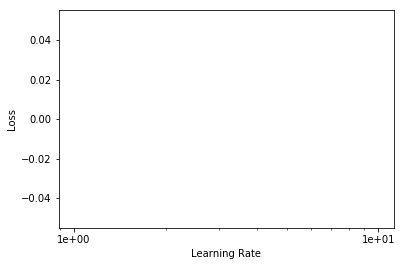

In [77]:
learn.lr_find()

learn.recorder.plot(suggestion=True)

In [78]:
lr=1.58E-04
wd=.13

In [79]:
learn.fit_one_cycle(1,lr,wd=wd)

epoch,train_loss,valid_loss,root_mean_squared_error,time
0,16093054.000000,20759638.000000,1620.998413,01:07


In [80]:
learn.save('stage-1')

learn.load('stage-1');

In [81]:
learn.fit_one_cycle(1,lr,wd=wd)

epoch,train_loss,valid_loss,root_mean_squared_error,time
0,6607592.500000,20680558.000000,1605.398560,01:08


In [82]:
learn.save('stage-2');

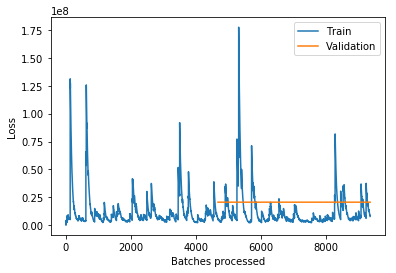

In [59]:
learn.recorder.plot_losses()